## Example Graph Max Cut

2018/7/20

---

In [1]:
%matplotlib inline

In [2]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
import networkx as nx

### Definitions

In [12]:
def convert_idxs(idxs):
    """Converts Max Cut indices from [-1,+1] to [0, 1]"""
    return [(i+1)//2 for i in cut_idxs]

def draw_graph(A, cut_idxs=None):
    """
    Draws a NetworkX graph.
    
    Parameters:
    -----------
    A : np.ndarray
        adjacency matrix
        
    cut_idxs : list
        the output indices from the quantum circuit.
    """
    # create graph
    graph = nx.from_numpy_matrix(A)
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    pos = nx.spring_layout(graph)

    ## get position info of first set
    # nodes
    cutlist = [i for i in range(len(cut_idxs)) if cut_idxs[i]==0]
    # edges
    cut_edgelist = [e for e in graph.edges if ((e[0] in cutlist and e[1] not in cutlist) or (e[1] in cutlist and e[0] not in cutlist))]
    edgelist = [e for e in graph.edges if e not in cut_edgelist]

    # draw graph
    nx.draw(graph, pos, node_color='darkblue', node_size=1000)
    if cut_idxs is not None:
        nx.draw_networkx_nodes(graph, pos, node_size=1000, nodelist=cutlist, node_color='darkred')
        nx.draw_networkx_edges(graph, pos, width=3, edgelist=cut_edgelist, edge_color='steelblue')
    nx.draw_networkx_labels(graph, pos, font_color='white', font_size=20)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_weights, font_size=15)
    nx.draw_networkx_edges(graph, pos, width=3, edgelist=edgelist, edge_color='k');

    print('EDGES:\nRED (within set) BLACK (between sets)')
    print('\nNODES: color:set')
    print(f'\nEdges Cut: {len(cut_edgelist)}')

def check_constraints(A, X):
    """Implementing constraints from: https://arxiv.org/pdf/1712.06729.pdf"""
    valid = True
    a_half = A.shape[0] // 2
    
    # A11 = A22.T
    A11 = A[:a_half, :a_half]
    A22 = A[a_half:, a_half:]
    if not np.array_equal(A22, A11.T):
        valid = False
    
    # A21 = A12
    A12 = A[:a_half, a_half:]
    A21 = A[a_half:, :a_half]
    if not np.array_equal(A21, A12):
        valid = False
    
    # XA: symmetric
    if not np.array_equal(X@A, (X@A).T):
        valid = False
        
    return valid

### Visualizations

In [24]:
## Used for quantum circuit
# n_qmodes = 2
# c = 1    # c & d values relevant for Gaussian function
# d = 0.05

# I = np.eye(2*n_qmodes)
# X = np.block([[np.zeros((n_qmodes,n_qmodes)), np.eye(n_qmodes)],
#              [np.eye(n_qmodes), np.zeros((n_qmodes,n_qmodes))]])

In [16]:
A = np.array([[ c, -2, -10,  1],
              [-2,  c,   1,  5],
              [-10, 1,   c, -2],
              [ 1,  5,  -2,  c]])

cut_idxs = [-1,1,-1,1] # result of quantum circuit
cut_idxs = convert_idxs(cut_idxs) # convert [-1,+1] –> [0, 1]

EDGES:
RED (within set) BLACK (between sets)

NODES: color:set

Edges Cut: 4


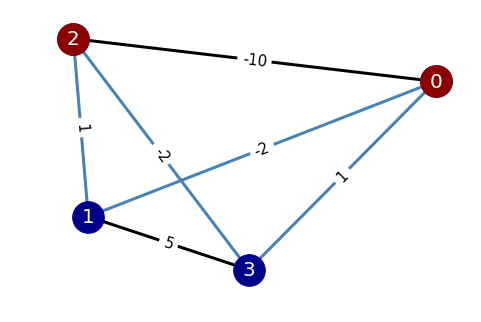

In [17]:
draw_graph(A, cut_idxs=cut_idxs)

EDGES:
RED (within set) BLACK (between sets)

NODES: color:set

Edges Cut: 2


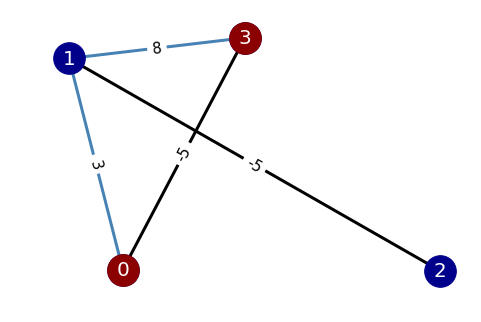

In [23]:
A = np.array([[ c,  3,  0, -5],
              [ 3,  c, -5,  8],
              [ 0, -5,  c,  0],
              [-5,  8,  0,  c]])

cut_idxs = [-1,1,1,-1] # result of quantum circuit
cut_idxs = convert_idxs(cut_idxs) # convert [-1,+1] –> [0, 1]

draw_graph(A, cut_idxs=cut_idxs)

EDGES:
RED (within set) BLACK (between sets)

NODES: color:set

Edges Cut: 2


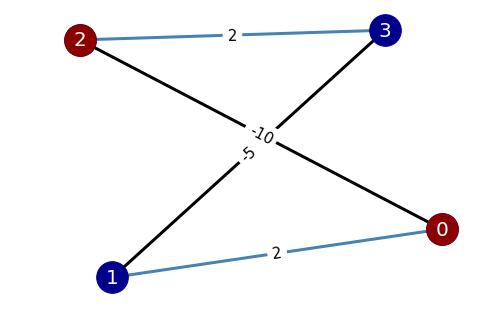

In [35]:
A = np.array([[  c,  2,-10,  0],
              [  2,  c,  0, -5],
              [-10,  0,  c,  2],
              [  0, -5,  2,  c]])

cut_idxs = [-1,1,-1,1] # result of quantum circuit
cut_idxs = convert_idxs(cut_idxs) # convert [-1,+1] –> [0, 1]

draw_graph(A, cut_idxs=cut_idxs)

EDGES:
RED (within set) BLACK (between sets)

NODES: color:set

Edges Cut: 4


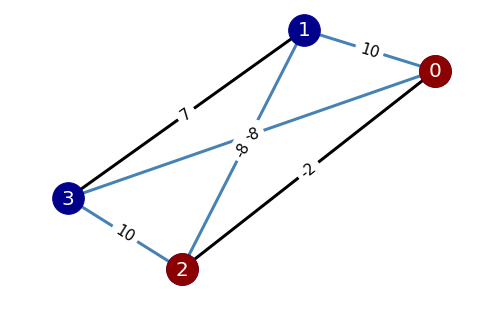

In [28]:
A = np.array([[ c, 10, -2, -8],
              [10,  c, -8,  7],
              [-2, -8,  c, 10],
              [-8,  7, 10,  c]])

cut_idxs = [-1,1,-1,1] # result of quantum circuit
cut_idxs = convert_idxs(cut_idxs) # convert [-1,+1] –> [0, 1]

draw_graph(A, cut_idxs=cut_idxs)